<h3><em>Обробка та аналіз БМД Лабораторна 7 Кононов Антон БС-82</em></h3>
<h5>t-критерій Стьюдента для незалежних вибірок</h5>

<h6>Завдання</h6>

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.


In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randint
from math import sqrt

In [83]:
col_1 = randint(0, 20, 31)
col_2 = randint(0, 20, 31)
data = pd.DataFrame({"Малий басейн": col_1, "Великий басейн": col_2,})
data.index.name = 'Число місяця'
data.columns.name = 'Кількість відвідувачів'
N = data.shape[0]
data

Кількість відвідувачів,Малий басейн,Великий басейн
Число місяця,,
0,8,14
1,13,9
2,13,16
3,6,15
4,5,8
5,13,11
6,14,18
7,4,9
8,6,17


2. Побудувати графік, що відображає розкид даних в групах.

[]

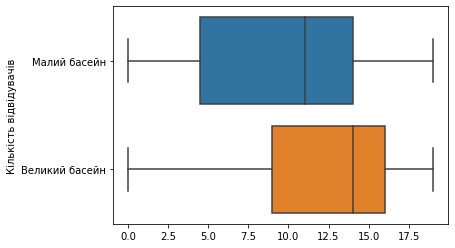

In [84]:
sns.boxplot(data = data, orient = 'h').set()

3. Написати функції:

-для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).

-для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [113]:
def get_sigma(array):
    mean = sum(array)/N
    summa = 0
    for i in range(N):
        summa += (array[i] - mean)**2
    return summa/(N - 1)

def Liven(data):
    sig1 = get_sigma(data["Малий басейн"])
    sig2 = get_sigma(data["Великий басейн"])
    
    if(sig1>sig2):
        F = sig1/sig2
    else:
        F = sig2/sig1
    print('Отримане значення критерію Лівеня : F = ' + str(F))
    df = df1 = df2 = N - 1
    if df1 > 15:
        df1 = '>15'
        
    if df2 > 20:
        df2 = '>20'
    print('Значення ступенів свободи: df = ' + str(df))
    critical_table = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx",index_col=0)
    critical_table = critical_table[df1][df2]
    print("Критичне значення критерію Лівеня = " + str(critical_table))
    result = ("significant") if F < critical_table else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return F, result
result = Liven(data)[1]

Отримане значення критерію Лівеня : F = 1.386166081006103
Значення ступенів свободи: df = 30
Критичне значення критерію Лівеня = 1.45
Результат оцінки значимості зв'зку: significant


In [114]:
def Student(data, level):
    sig1 = get_sigma(data["Малий басейн"])
    sig2 = get_sigma(data["Великий басейн"])
    df = 2*N - 2
    if level == 'significant':
        t = (abs((sum(data["Малий басейн"])/N) - (sum(data["Великий басейн"])/N)))/sqrt((sig1 / N) + (sig2 / N))
    else:
        t = (abs((sum(data["Малий басейн"])/N) - (sum(data["Великий басейн"])/N))) / sqrt(((N - 1)*sig1 + (N - 1)*sig2)*((1/N)+(1/N)) / df)
    print('Отримане значення критерію Стьюдента: t = ' + str(t))
    print('Значення ступеня свободи: df = ' + str(df))
    critical_table = pd.read_excel("Таблиця критичних значень для критерію Стьюдента.xlsx").iloc[df, 1]
    print("Критичне значення критерію Стьюдента = " + str(critical_table))
    result = ("significant") if t < critical_table else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return t, df, result

In [115]:
Liven(data)

Отримане значення критерію Лівеня : F = 1.386166081006103
Значення ступенів свободи: df = 30
Критичне значення критерію Лівеня = 1.45
Результат оцінки значимості зв'зку: significant


(1.386166081006103, 'significant')

In [116]:
Student(data, result)

Отримане значення критерію Стьюдента: t = 2.097593678582161
Значення ступеня свободи: df = 60
Критичне значення критерію Стьюдента = 2.0
Результат оцінки значимості зв'зку: not significant


(2.097593678582161, 60, 'not significant')

4. Перевірити розбіжність на між групами на даних з п. 1.

За допомогою тесту Лівеня було отримано результат, що довзволяє прийняти нульову гіпотезу та зробити висновок, що дисперсіїї однорідні.

За допомогою розрахунку критерію t-Стьюдента для незалежних вибірок ми відхилили нульову гіпотезу і зробили висновок, що середні відмінні.